#### PREPARE
modules import, clean data import

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math as math

In [3]:
df = pd.read_csv('../boston_clean.csv')

##### CHANGING TYPE OF COLUMNS THAT USING TIME AS VALUES

In [5]:
time_columns = ['Pace', '5K', '10K', '15K', '20K', '25K', '30K', '35K', '40K', 'Official Time']
df[time_columns] = df[time_columns].apply(lambda col: pd.to_timedelta(col, errors='coerce'))

# BIVARIATE

## Age x Pace

In [8]:
df_age_pace = df.copy()[['Age', 'Pace']]

In [9]:
age_pace = df_age_pace.groupby(by='Age')['Pace'].agg(
    min_pace='min',
    max_pace='max',
    mean_pace='mean',
    median_pace='median')
age_pace

,min_pace,max_pace,mean_pace,median_pace
Age,,,,
18,0 days 00:03:57.985166626,0 days 00:08:36.980831941,0 days 00:06:03.532213806,0 days 00:06:03.812833054
19,0 days 00:03:29.402091783,0 days 00:10:03.972798854,0 days 00:05:42.502522494,0 days 00:05:25.598504732
20,0 days 00:03:22.567008669,0 days 00:08:34.495347172,0 days 00:05:29.140791263,0 days 00:05:19.384792809
21,0 days 00:03:08.896842440,0 days 00:08:34.495347172,0 days 00:05:31.695312462,0 days 00:05:18.142050425
22,0 days 00:03:30.023462976,0 days 00:08:34.495347172,0 days 00:05:33.528300289,0 days 00:05:21.870277578
...,...,...,...,...
80,0 days 00:06:01.638033882,0 days 00:08:32.009862403,0 days 00:07:02.221725124,0 days 00:06:45.444702934
81,0 days 00:06:19.657798457,0 days 00:08:43.815915056,0 days 00:07:25.026047880,0 days 00:07:36.707826294
82,0 days 00:06:07.230374612,0 days 00:08:29.524377634,0 days 00:07:39.193311063,0 days 00:08:00.009246003


### visualization

In [11]:
df_age_pace['Pace'] = df_age_pace['Pace'].dt.total_seconds() / 60

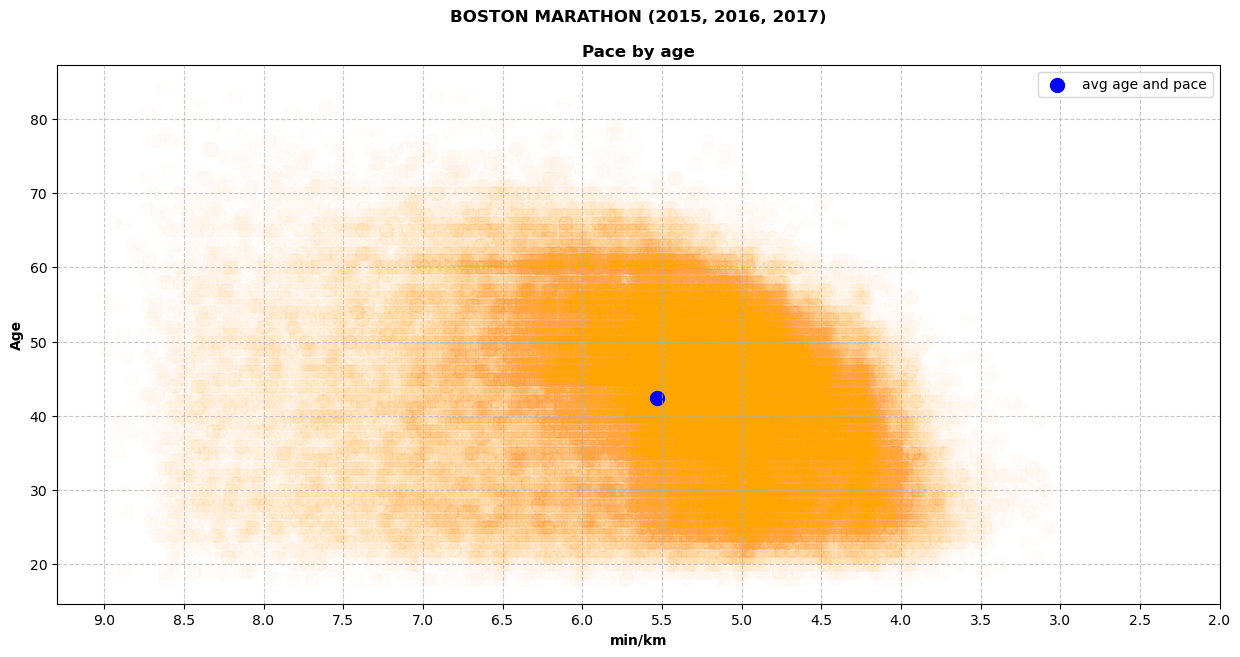

In [12]:
threshold = 9
df_age_pace = df_age_pace[df_age_pace['Pace'] < threshold]

plt.figure(figsize=(15,7))
x = df_age_pace['Pace']
y = df_age_pace['Age']

plt.scatter(x, y, color='orange', alpha=0.01, s=100)
plt.scatter(x.mean(), np.mean(y), s=100, alpha=1, color='b', label='avg age and pace')

plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(np.arange(2,9.5,0.5))
# plt.yticks(np.arange(20,81,10))
plt.gca().invert_xaxis()

plt.xlabel('min/km', fontweight='bold')
plt.ylabel('Age', fontweight='bold')
plt.title('BOSTON MARATHON (2015, 2016, 2017)\n\nPace by age', fontweight='bold')

plt.savefig("../vexport/agexpace.png", dpi=300, bbox_inches='tight')
plt.show()

In [13]:
for column in age_pace:
    age_pace[column] = age_pace[column].dt.total_seconds() / 60

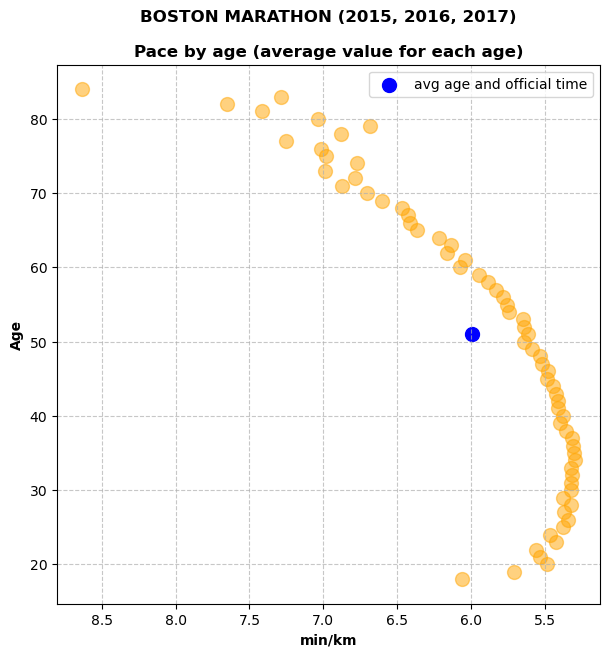

In [14]:
x = age_pace['mean_pace']
y = age_pace.index

plt.figure(figsize=(7,7))
plt.scatter(x, y, color='orange', s=100, alpha=0.5)
plt.scatter(x.mean(), np.mean(y), s=100, color='b', label='avg age and official time')

plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
# plt.xticks(np.arange(3,7.5,0.5))
# plt.yticks(np.arange(20,81,5))
plt.gca().invert_xaxis()

plt.xlabel('min/km', fontweight='bold')
plt.ylabel('Age', fontweight='bold')
plt.title('BOSTON MARATHON (2015, 2016, 2017)\n\nPace by age (average value for each age)', fontweight='bold')

plt.savefig("../vexport/agexpace_avg.png", dpi=300, bbox_inches='tight')
plt.show()

#### export

In [16]:
age_pace.to_csv('../export/agexpace.csv')